In [1]:
import sys
print(sys.version)

3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]


In [8]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 38.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.8 MB/s eta 0:00:00
     ---------------------------------------- 103.1/103.1 kB ? eta 0:00:00
     ---------------------------------------- 55.8/55.8 kB ? eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 30.8 MB/s eta 0:00:00


In [2]:
!pip install pymagnitude

     ---------------------------------------- 5.4/5.4 MB 43.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): still running...
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymagnitude: filename=pymagnitude-0.1.143-cp37-cp37m-win_amd64.whl size=85332678 sha256=e7980a82653b8bf232ea1ab2dc32d15ebf1a9cbd9457230563b5fc6f8c9d4cd3
  Stored in directory: c:\users\xinyili0026\appdata\local\pip\cache\wheels\45\82\aa\74ea6537f8e08bc9ed5b4db2a9befc6af92bd52ae204b12cfd
Successfully built pymagnitude


In [3]:
from pymagnitude import *
file_path="C:/Users/xinyili0026/Downloads/GoogleNews-vectors-negative300.magnitude"
vectors=Magnitude(file_path)

In [4]:
#Question1: get the dimensionality of these word embedding
#vectors.dim is the functior to query the dimensions of the vectors
vectors.dim #The dimension is 300

300

In [5]:
#Question2: top-5 most similar words to picnic
#vectors.most_similiar is the function to query for the most similar (nearest neighbors) keys
vectors.most_similar("picnic", topn = 100) 
#The top-5 most similar words are 'picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic', 'picnic_supper'

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123),
 ('picnicking', 0.63550216),
 ('cookout', 0.63243484),
 ('Hiking_biking_camping', 0.6256069),
 ('barbeque', 0.62256277),
 ('barbecue', 0.6195759),
 ('picnic_lunches', 0.6143184),
 ('pig_roast', 0.61019313),
 ('Bring_picnic', 0.6033048),
 ('potluck', 0.60114384),
 ('picnic_tables', 0.6006263),
 ('Hawaiian_luau', 0.5982951),
 ('wiener_roast', 0.59388626),
 ('potluck_dinner', 0.5916978),
 ('fish_fry', 0.58994764),
 ('gazebo', 0.58934724),
 ('teddy_bear_picnic', 0.5891956),
 ('picnic_table', 0.58790123),
 ('potluck_lunch', 0.5856319),
 ('potluck_barbecue', 0.58500683),
 ('brunch', 0.5848722),
 ('blankets_lawn_chairs', 0.5800308),
 ('ox_roast', 0.57900274),
 ('shaded_picnic', 0.57885706),
 ('Easter_egg_hunt', 0.5787928),
 ('weiner_roast', 0.5769961),
 ('Easter_egg_hunts', 0.57512593),
 ('potluck_meal', 0.5742372),
 ('Picnics', 0.5731207),
 ('potluck_su

In [25]:
#Question 2 option2: by vector
Q2o2=vectors.most_similar(vectors.query("picnic"), topn = 100)
print(Q2o2)
#We will get the same result as the first way, excpet for the word "picnic" itself

[('picnic', 0.9999998), ('picnics', 0.7400875), ('picnic_lunch', 0.721374), ('Picnic', 0.700534), ('potluck_picnic', 0.6683274), ('picnic_supper', 0.65189123), ('picnicking', 0.63550216), ('cookout', 0.63243484), ('Hiking_biking_camping', 0.6256069), ('barbeque', 0.62256277), ('barbecue', 0.6195759), ('picnic_lunches', 0.6143184), ('pig_roast', 0.61019313), ('Bring_picnic', 0.6033048), ('potluck', 0.60114384), ('picnic_tables', 0.6006263), ('Hawaiian_luau', 0.5982951), ('wiener_roast', 0.59388626), ('potluck_dinner', 0.5916978), ('fish_fry', 0.58994764), ('gazebo', 0.58934724), ('teddy_bear_picnic', 0.5891956), ('picnic_table', 0.58790123), ('potluck_lunch', 0.5856319), ('potluck_barbecue', 0.58500683), ('brunch', 0.5848722), ('blankets_lawn_chairs', 0.5800308), ('ox_roast', 0.57900274), ('shaded_picnic', 0.57885706), ('Easter_egg_hunt', 0.5787928), ('weiner_roast', 0.5769961), ('Easter_egg_hunts', 0.57512593), ('potluck_meal', 0.5742372), ('Picnics', 0.5731207), ('potluck_supper', 0.5

In [14]:
#get the labels and scores from 'picnic' to 'picnic_supper'
labels = [item[0] for item in Q2o2[:6]]
scores = [item[1] for item in Q2o2[:6]]

for label, score in zip(labels, scores):
    print(f"{label}: {score}")

picnic: 0.9999998211860657
picnics: 0.7400875091552734
picnic_lunch: 0.721373975276947
Picnic: 0.7005339860916138
potluck_picnic: 0.6683273911476135
picnic_supper: 0.6518912315368652


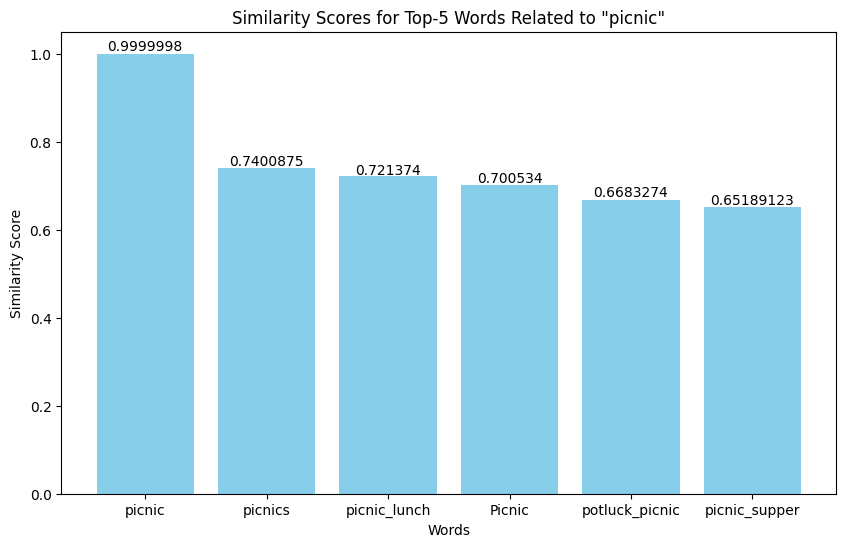

In [22]:
#Create a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(labels, scores, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Similarity Score')
plt.title('Similarity Scores for Top-5 Words Related to "picnic"')
# Add the scores on the bars
for i in range(len(scores)):
    plt.text(i, scores[i], str(scores[i]), ha = 'center', va = 'bottom')

plt.show()

In [23]:
#Question3: which of these words is not like the others
#vectors.doesnt_match is the function to query for which key doesn't match a list of keys
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'] )
#The word which is not like the others is "tissue".

'tissue'

In [24]:
#Question4: Analogies
#leg is to jump as X is to throw
#leg - jump = X - throw
#leg - jump + throw =X
#Using the function below is to query for the most similar keys giving positive and negative examples (which, incidentally, solves analogies)
vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"])
#X = "forearm"

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]